In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
import pickle

In [4]:
# Load data
X_raw, y_raw = load_iris(return_X_y=True, as_frame=True)

df_raw = X_raw
df_raw['species'] = y_raw

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df_raw.sample(10, random_state=2025)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2
112,6.8,3.0,5.5,2.1,2
132,6.4,2.8,5.6,2.2,2
0,5.1,3.5,1.4,0.2,0
113,5.7,2.5,5.0,2.0,2
34,4.9,3.1,1.5,0.2,0
51,6.4,3.2,4.5,1.5,1
135,7.7,3.0,6.1,2.3,2
5,5.4,3.9,1.7,0.4,0


In [6]:
# Preprocessing
df_baking = df_raw.copy()

df_baking.columns = df_baking.columns.str.lower().str.replace('()', '')
df_baking['species'] = df_baking['species'].map({0: 'setosa',
                                                 1: 'versicolor',
                                                 2: 'virginica'})
df_baking['species'] = df_baking['species'].astype('category')
df = df_baking.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [8]:
# EDA
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['species'], random_state=2025)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((120, 5), (30, 5))

In [9]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.830000,0.814119,4.3,5.100,5.8,6.4,7.9
sepal width (cm),120.0,3.054167,0.436159,2.0,2.800,3.0,3.4,4.4
petal length (cm),120.0,3.753333,1.766016,1.1,1.575,4.4,5.1,6.9
petal width (cm),120.0,1.203333,0.760355,0.1,0.300,1.3,1.8,2.5


,count,unique,top,freq
species,120,3,setosa,40


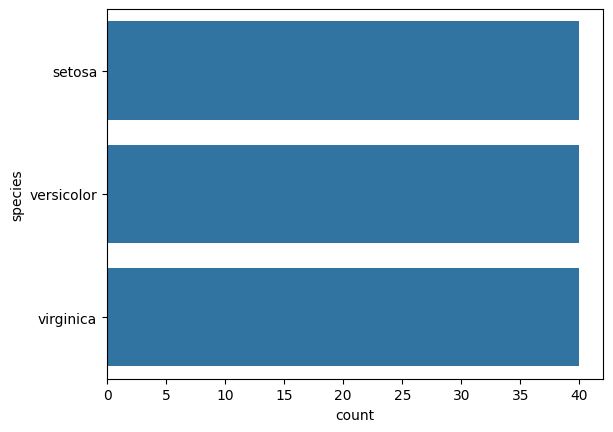

In [12]:
sns.countplot(data=df_train, y='species')
plt.show()

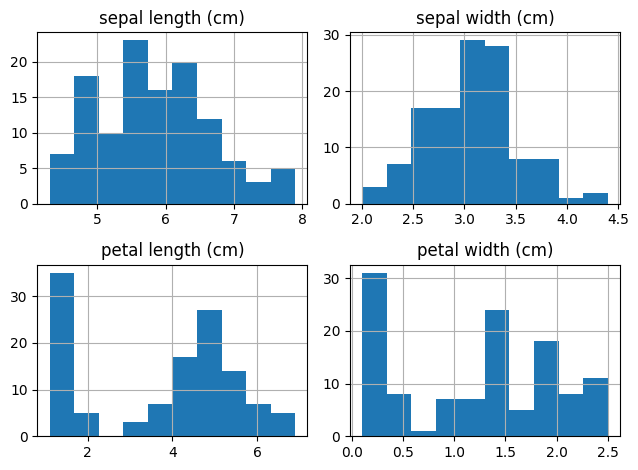

In [13]:
df_train.hist()
plt.tight_layout()
plt.show()

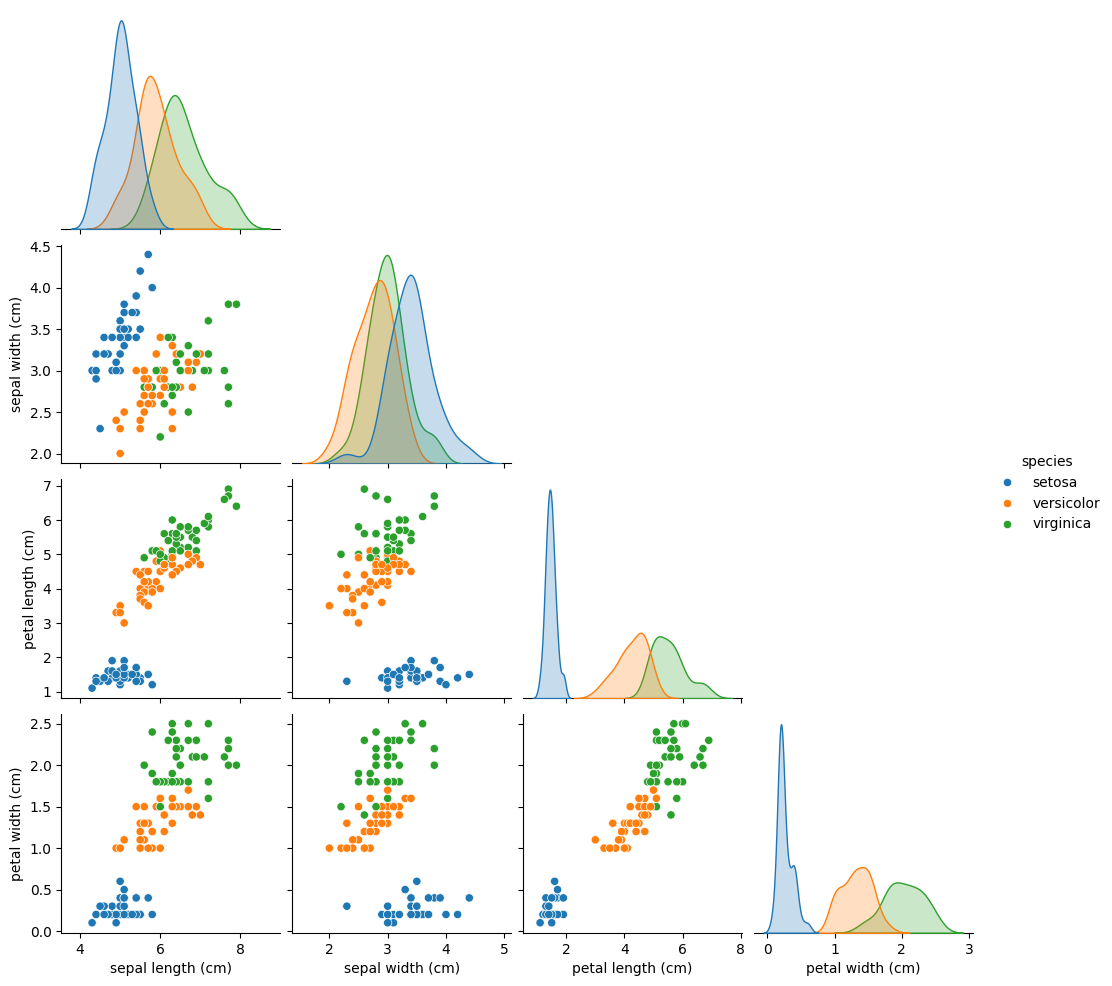

In [14]:
sns.pairplot(df_train, hue='species', corner=True)
plt.show()

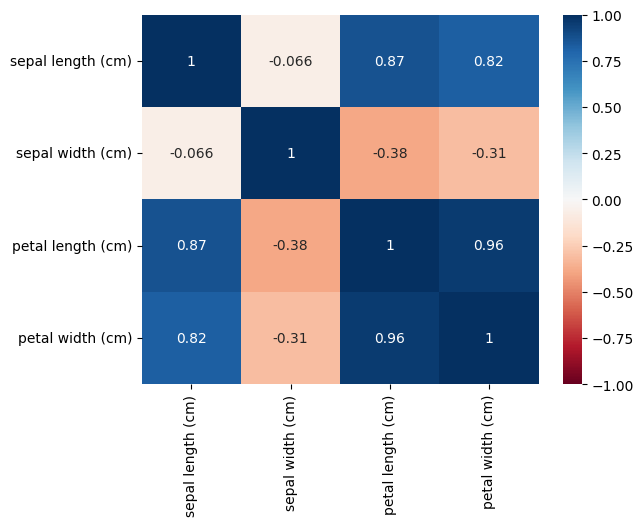

In [15]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [16]:
# Machine learning
X_train = df_train.drop(columns='species')
y_train  = df_train['species']

X_test = df_test.drop(columns='species')
y_test  = df_test['species']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

In [21]:
clf_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=2025))
])

In [22]:
clf_rf.fit(X_train, y_train_enc)
y_hat = clf_rf.predict(X_test)

In [24]:
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat):.2f}')
print(f'R2 score: {r2_score(y_test_enc, y_hat)}')

Accuracy score: 0.97
R2 score: 0.95


In [45]:
# Description
artifact = {'name': 'prediction model for Iris dataset',
         'author': 'Agustín Melian Su',
         'model': clf_rf,
         'predictors': X_train.columns.to_list(),
         'target_name': y_train.name,
         'target_encoder': label_encoder,
         'version': '1.0',
         'algorithm_name': 'Random Forest'
    }

In [46]:
# Save model
with open('../models/iris_models.pkl', 'wb') as file:
    pickle.dump(artifact, file)